# Load Data csv

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
# masuk ke draf environment input
#!ls -al ../input/

In [3]:
# masukkan environmen input ke dalam variable path
#path = '../input/'
# variable train_file menampung data train.csv 
#train_file = 'train.csv'
# variable train_file menampung data test.csv
#test_file = 'test.csv'
# membaca file berformat csv ke sebuah dataframe yang ditampung di variable train_df yang berada di direktori path/train file
#train_df = pd.read_csv(path+train_file)
# membaca file berformat csv ke sebuah dataframe yang ditampung di variable test_df yang berada di direktori path/test file
#test_df = pd.read_csv(path+test_file)
train_df = pd.read_csv('train.csv')
test_df = df = pd.read_csv('test.csv')

In [4]:
# Fungsi/method ini mengambil 5 posisi baris pertama 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

# Exploratory Data Anaysis

In [6]:
# Menghasilkan data ringkasan statistik yang merangkum kecenderungan sentral
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Fungsi ini memanggil 5 baris terakhir dari objek 
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


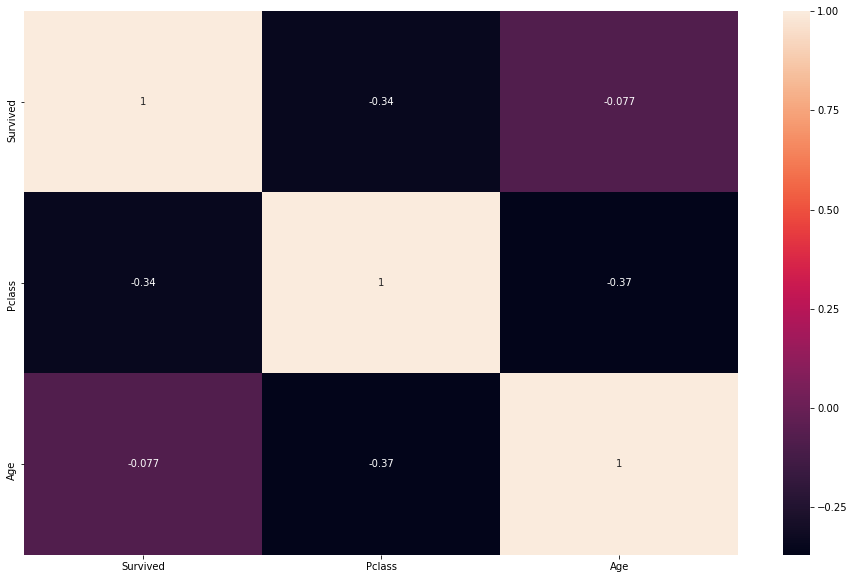

In [8]:
# memfisualisasikan korelasi dengan mengambil beberapa fitur yang akan di tampilkan
plt.figure(figsize=(16,10))
sns.heatmap(train_df[['Survived', 'Sex', 'Pclass', 'Age']].corr(), annot=True)
plt.show()

In [9]:
# menganalisis korelasi fitur, pada tahap ini fitur yang memiliki nilai 
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
# menganalisis korelasi fitur, pada tahap ini fitur yang memiliki nilai 
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
# menganalisis korelasi fitur, pada tahap ini fitur yang memiliki nilai 
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


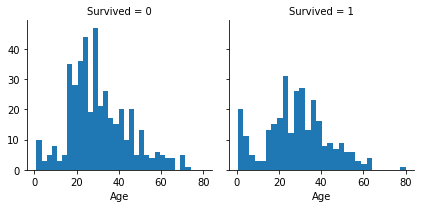

In [12]:
# visualisasi yang survive dan tidak survive berdasarkan umur
a = sns.FacetGrid(train_df, col='Survived')
a.map(plt.hist, 'Age', bins=30)

/opt/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


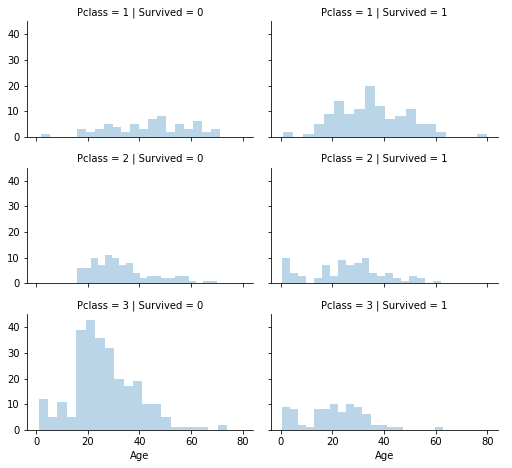

In [13]:
#Kelas ini memetakan dataset ke beberapa sumbu yang disusun dalam baris dan kolom yang sesuai dengan tingkat variabel dalam dataset
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.3, bins=20)
grid.add_legend();

# Correlation Analysis and Feature Selection

In [14]:
# menghitung korelasi berpasangan dari  masig2 kolom, tidak termasuk nilai NA / null
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


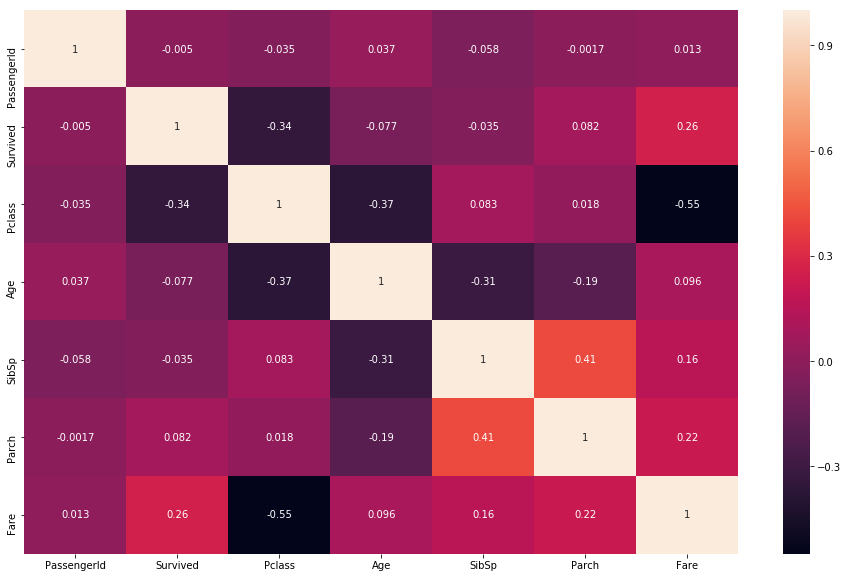

In [15]:
#visualisasi korelasi dengan heatmap
plt.figure(figsize=(16,10))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

# Wrangling Data Analysis

In [16]:
# mengubah female menjai angka dan male menjadi angka 1
mapping = {'female': 0, 'male': 1}
train_df = train_df.replace({'Sex': mapping})

In [18]:
# mengubah type data sex menjadi int
train_df['Sex'].apply(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#mengecek fitur age yang mempunyai nilai null
print(train_df[train_df['Age'].isnull()])

     PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
42            43         0       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
55            56         1       1   
64            65         0       1   
65            66         1       3   
76            77         0       3   
77            78         0       3   
82            83         1       3   
87            88         0       3   
95            96         0       3   
101          102         0       3   
107          108         1       3   
109          110         1       3   
121         

In [22]:
# mengkonversi fitur age ke numerik
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

In [23]:
# menghapus NaN pada kolong age
train_df = train_df.dropna(subset=['Age'])

In [24]:
# merubah tipe data age menjadi int
train_df['Age'] = train_df['Age'].astype(int)

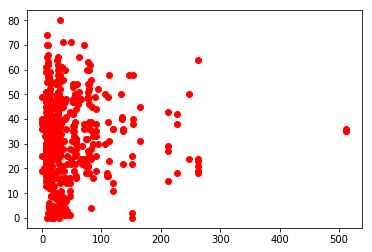

In [25]:
# nggak pakai ini
sv1_df = train_df[train_df['Survived'] == 1]
sv0_df = train_df[train_df['Survived'] == 0]

plt.plot(train_df['Fare'], train_df['Age'], 'ro')
# plt.plot(sv0_df['Sex'], sv0_df['Age'], 'bo')

In [26]:
# mengecek dan menghitung berapa jumlah yng survive dan tidak survive
y = train_df['Survived']
y.value_counts()

0    424
1    290
Name: Survived, dtype: int64

# Visualization with PCA

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

col_study = ['Pclass', 'Sex', 'Age']

# memisahkan fitur-fitur
x = train_df.loc[:, col_study].values

# split(memecah menjadi dua parameter yaitu X dan y)
y = train_df.loc[:,['Survived']].values
X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    # test_size (mengambil 33% dari data 100%)
    test_size=0.33, 
    # random_state (mengambil data secara random)
    random_state=42
)

# memanggil X_train
X_train

array([[ 3,  1, 25],
       [ 1,  0, 16],
       [ 3,  1, 44],
       ...,
       [ 1,  0, 41],
       [ 3,  1, 33],
       [ 3,  1, 33]])

In [29]:
from sklearn.decomposition import PCA, LatentDirichletAllocation as LDA

#kode di bawah ini mengambil 4 fitur kolom (Pclass, Age, Sex). 
#Pada bagian ini, kode memproyeksikan data asli yang 3 dimensi menjadi 2 dimensi. 
pca = PCA(n_components = 2, random_state = 5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2'])

principalDf.head()

,pc1,pc2
0,-7.692665,-0.662758
1,8.343258,1.165855
2,-3.696667,-0.551944
3,5.343957,1.226968
4,5.304308,-0.927580


In [30]:
# dibawah ini menggabungkan dataframe menjadi satu, principalDF dengan survived
finalDf = pd.concat([principalDf, train_df[['Survived']]], axis = 1)
finalDf.head()

,pc1,pc2,Survived
0,-7.692665,-0.662758,0.0
1,8.343258,1.165855,1.0
2,-3.696667,-0.551944,1.0
3,5.343957,1.226968,1.0
4,5.304308,-0.927580,0.0


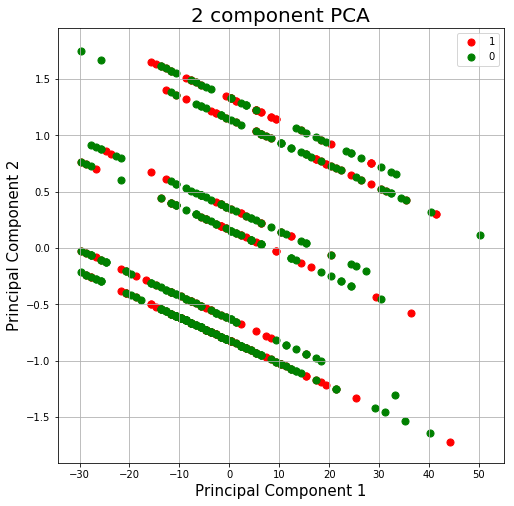

In [32]:
# Bagian ini hanya mem-plot data 2 dimensi.
# menentukan ukuran gambar grafik dalam inch
fig = plt.figure(figsize = (8,8))

# digit pertama adalah jumlah baris, yang kedua jumlah kolom, dan ketiga indeks subplot. 
ax = fig.add_subplot(1,1,1)

#mengeset xlabel adalah Principal Component 1, ylabel adalah Principal Component 2 dan 2 component PCA sevagai judul
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# targetnya adalah 1 dan 0, survive / unsurvived dengan warna red untuk survived dan green untuk unsurvived
targets = [1, 0]
colors = ['r', 'g']
# perulangan yang menyesuaikan antara target dan colors menggunakan zip
for target, color in zip(targets, colors):
    #mencocokkan dari finalDf dengan fitur survived dengan target
    indicesToKeep = finalDf['Survived'] == target
    # scatter, mengakses finalDf dengan pc1 dan pc2
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1'],
               finalDf.loc[indicesToKeep, 'pc2'],
               # warna
               c = color,
               # ukuran
              s = 50
    )
# fix
ax.legend(targets)
# Konfigurasikan garis kisi.
ax.grid()

# Training with Logistic Regression 

In [33]:
from sklearn.linear_model import LogisticRegression
# clf_LR(class), LogisticRegression ()
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)

In [34]:
# (fit = method) Fit the model according to the given training data / proses training
clf_LR.fit(X_train,y_train)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
# memprediksi dari x_test (data tebakan) yaitu (age, gender, pclass) dari data yg belum di training
y_pred = clf_LR.predict(X_test)

from sklearn.metrics import confusion_matrix
# menghasilkan data tebakan
confusion_matrix(y_test, y_pred)

array([[116,  21],
       [ 32,  67]])

In [36]:
# melihat akurasi skor dari clf_LR
clf_LR.score(X_test, y_test)

0.7754237288135594

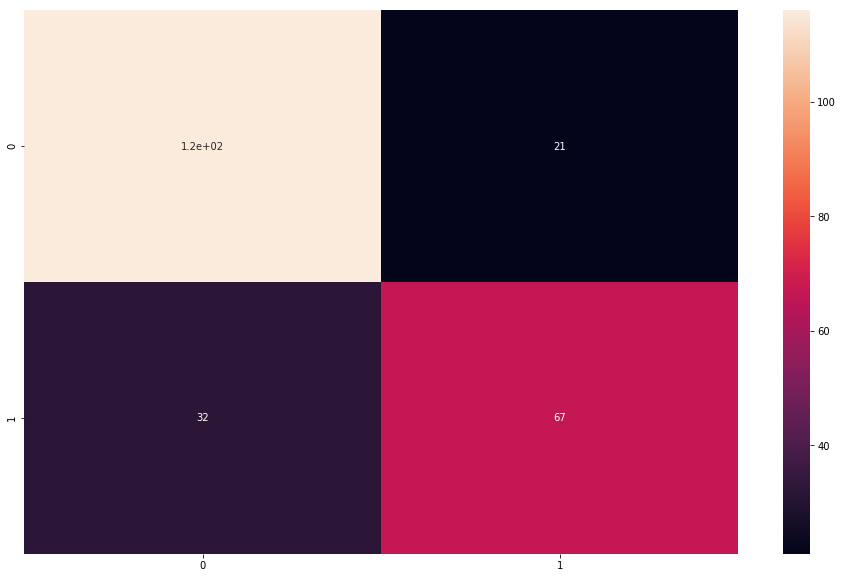

In [37]:
# visualisasi 
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# Training with Support Vector Machine

In [38]:
from sklearn import svm

In [39]:
# clf(class), svm.SVC (modul)
clf = svm.SVC(kernel='linear', C=1.0)
# (fit = method) Fit the model according to the given training data / proses training
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
from sklearn.metrics import confusion_matrix

# memprediksi dari x_test (data tebakan) yaitu (age, gender, pclass) dari data yg belum di training
y_train_pred = clf.predict(X_test)
#menghasilkan data tebakan
confusion_matrix(y_test, y_train_pred)

array([[113,  24],
       [ 34,  65]])

In [41]:
# melihat akurasi skor dari clf_LR
clf.score(X_test, y_test)

0.7542372881355932

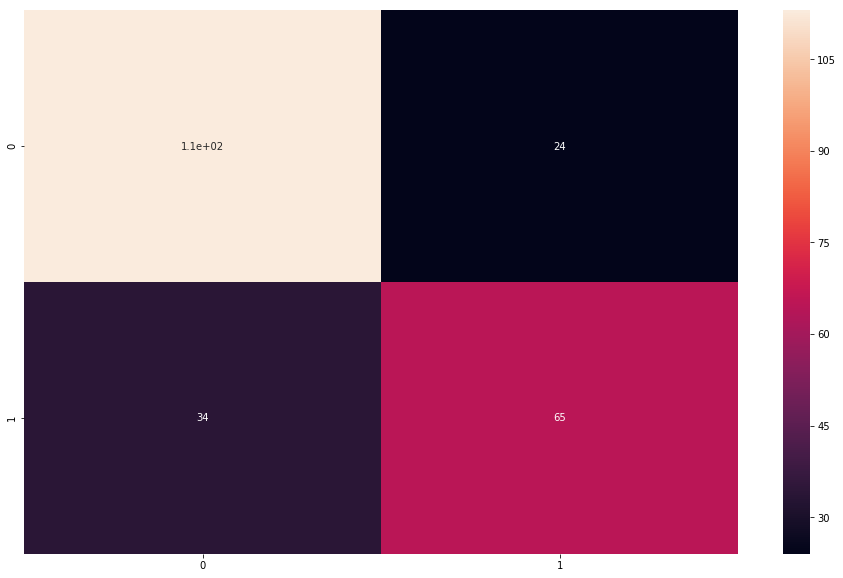

In [42]:
# visualisasi
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix(y_test, y_train_pred), annot=True)
plt.show()

# Training with Decision Tree

In [43]:
from sklearn import tree
clfTree = tree.DecisionTreeClassifier(random_state=42)

In [44]:
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [45]:
from sklearn.metrics import confusion_matrix
y_train_pred = clfTree.predict(X_test)
confusion_matrix(y_test, y_train_pred)

array([[121,  16],
       [ 36,  63]])

In [46]:
clfTree.score(X_test, y_test)

0.7796610169491526

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_clf = RandomForestClassifier(random_state=42)

In [48]:
rf_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [49]:
from sklearn.metrics import confusion_matrix
y_train_pred = rf_clf.predict(X_test)
confusion_matrix(y_test, y_train_pred)

array([[118,  19],
       [ 31,  68]])

In [50]:
rf_clf.score(X_test, y_test)

0.788135593220339

In [51]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
       # print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
    elif train==False:
       # print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))

In [52]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

accuracy score: 0.9121



# Save model persistence

In [69]:
from joblib import dump, load
dump(rf_clf, 'titanic.joblib') 

['titanic.joblib']

# Production

In [70]:
rf_clf = load('titanic.joblib') 

In [74]:
def predict_survivor(sex, pclass, age):
    ''' sex = 0 is female '''
    test = np.array([[ sex, pclass, age]])
    rf_clf = load('titanic.joblib') 
    pred = rf_clf.predict(test)
    return pred[0]

predict_survivor(0, 0, 22)

1